In [1]:
def helper_isinterweave(x, y, s, comps) -> bool:   
    
    # denote m and n the lengths of x and y respectively
    n, m = len(x), len(y)    
       
    # create a table of results with dimmensions m+1 by n+1
    dp = [[False]*(m+1) for _ in range(n+1)]        
    # initialize the first row and column of the table with true
    dp[0][0] = True
    
        
    # state: dp[i][j] denote whether the first i+j letters in s is a 
    # interleaving of the first i elements in x and the first j
    # elements in y  
    for i in range(1, n+1):
        dp[i][0] = dp[i-1][0] and (x[i-1] == s[i-1])
        comps += 1
    for i in range(1, m+1):
        dp[0][i] = dp[0][i-1] and (y[i-1] == s[i-1])
        comps += 1

    # state transition: matching last character in x and y with that
    # of s
    for i in range(1, n+1):
        for j in range(1, m+1):
            if x[i-1] == s[i+j-1]:         # s3[:3] = "abc", s1[2] = 'c'
                dp[i][j] = dp[i-1][j]
                comps += 1
            if y[j-1] == s[i+j-1]:         # s3[:3] = "abc", s2[2] = 'c'
                dp[i][j] = dp[i][j] or dp[i][j-1]
                comps += 1

    # result: whether entire s is an interleaving of entire x and y
    return dp[-1][-1], comps

def rec_isinterweave(x, y, s, comps):    
    i=0
    if len(s)<len(x)+len(y):
        return False, comps
    value,comps = helper_isinterweave(x, y, s, comps)
    if value:
        return True, comps    
    else:
        return isinterweave(x, y, s[i+1:], comps)
    
def isinterweave(x, y, s, comps): 
    i = 0
    while len(s)-i>=len(x)+len(y):
        value,comps = helper_isinterweave(x, y, s[i:], comps)
        if value:
            return value,comps
        i += 1
    return False, comps
        

In [2]:
isinterweave('10110', '000011', '00100110110', 0)

(True, 43)

In [3]:
import random
import pandas as pd
from matplotlib import pyplot as plt
 
def generate_binary_string(n):
    # Generate a random number with n bits
    number = random.getrandbits(n)
    # Convert the number to binary
    binary_string = format(number, '0b')
    return binary_string

In [4]:
x='101'
y='00100'
s='100011001'
strings = []
for i in range(0,10000,100):
    temp_string = '0'*i*2+s
    temp_valid, temp_comps = isinterweave(x, y, temp_string, 0)
    strings.append({'n':len(temp_string),'valid':temp_valid, 'comps':temp_comps})    

In [5]:
df = pd.DataFrame(strings)
df['len(s)nm'] = df['n']*len(x)*len(y)

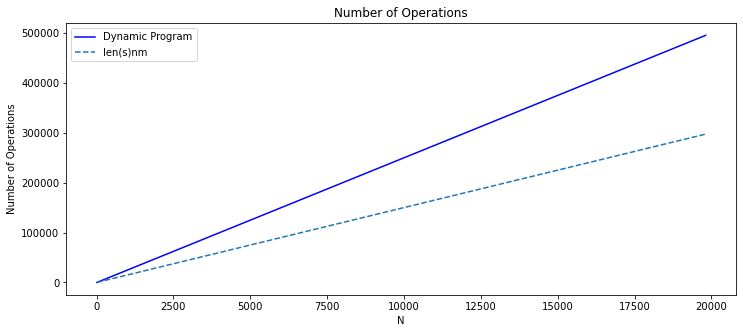

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df['n'], df['comps'],'blue', label='Dynamic Program')
plt.plot(df['n'], df['len(s)nm'],'--', label= 'len(s)nm')
plt.xlabel('N')
plt.ylabel('Number of Operations')
plt.title('Number of Operations')
plt.legend()
plt.savefig('../Analysis/Operations.jpg', bbox_inches='tight')

In [7]:
x = generate_binary_string(10)
y = generate_binary_string(10)
s= generate_binary_string(100)

random.randint(3, 9)

6

In [8]:
strings = []
for i in range(0,20000,100):
    temp_string = generate_binary_string(i)
    temp_x = generate_binary_string(random.randint(0,15))
    temp_y = generate_binary_string(random.randint(0,15))
    temp_valid, temp_comps = isinterweave(temp_x, temp_y, temp_string, 0)
    strings.append({'n':len(temp_string),'valid':temp_valid, 'comps':temp_comps, 'len(s)nm':len(temp_string)*len(temp_x)*len(temp_y)})   

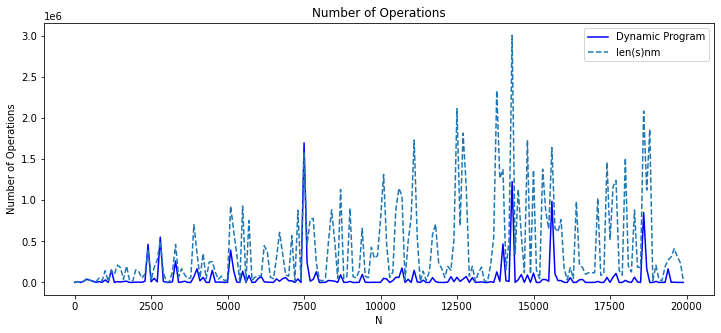

In [9]:
df = pd.DataFrame(strings)

from matplotlib import pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df['n'], df['comps'],'blue', label='Dynamic Program')
plt.plot(df['n'], df['len(s)nm'],'--', label= 'len(s)nm')
plt.xlabel('N')
plt.ylabel('Number of Operations')
plt.title('Number of Operations')
plt.legend()
plt.savefig('../Analysis/Operations2.jpg', bbox_inches='tight')